In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("shp1.png",1)
#findGoal(image_find_goal)
img1 = image.copy()
img = cv.resize(img1,(700,700))
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)

#range for red color
lower_r = np.array([36,0,0])
upper_r = np.array([86,255,255])
mask = cv.inRange(hsv,lower_r,upper_r)
res = cv.bitwise_and(img,img,mask=mask)
_,thresh = cv.threshold(res,125,255,cv.THRESH_BINARY)

# check which are the best canny threshold values for your image
imgCanny = cv.Canny(thresh, 140, 180)
cv.imshow('OBSTACLES',imgCanny)
cv.waitKey(0)
dilate = cv.dilate(imgCanny, None, iterations = 1)
cv.imshow("dilate", dilate)
cv.waitKey()

contours, hierarchy = cv.findContours(dilate,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
cnt1=contours[26]
for cnt in contours:
    epsilon = 0.1*cv.arcLength(cnt,True)
    approx = cv.approxPolyDP(cnt,epsilon,True)
    if len(approx) == 4:
        cv.drawContours(img,cnt1,-1,(60,255,255),4)
# img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
cv.imshow("contuor",img)
cv.waitKey(0)
cv.destroyAllWindows()

In [2]:


image2 = cv.imread("shp2.png",1)
#findGoal(image_find_goal)
img2 = image2.copy()
img3 = cv.resize(img2,(700,700))
hsv = cv.cvtColor(img3,cv.COLOR_BGR2HSV)

#range for red color
lower_r = np.array([36,0,0])
upper_r = np.array([86,255,255])
mask = cv.inRange(hsv,lower_r,upper_r)
res = cv.bitwise_and(img3,img3,mask=mask)
_,thresh = cv.threshold(res,125,255,cv.THRESH_BINARY)

# check which are the best canny threshold values for your image
imgCanny = cv.Canny(thresh, 140, 180)
cv.imshow('OBSTACLES',imgCanny)
cv.waitKey(0)
dilate = cv.dilate(imgCanny, None, iterations = 1)
cv.imshow("dilate", dilate)
cv.waitKey()

contour, hierarchy = cv.findContours(dilate,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
cnt2=contour[0]

cv.drawContours(img3,cnt2,-1,(60,255,255),4)
# img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
cv.imshow("contuor",img3)
cv.waitKey(0)
cv.destroyAllWindows()

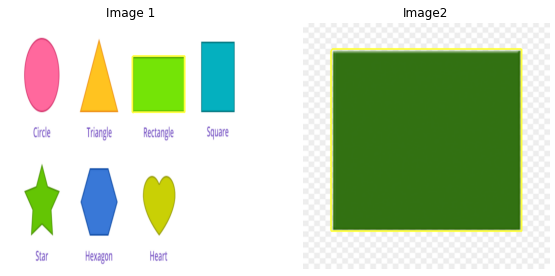

In [3]:

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Image 1");plt.axis('off')
plt.subplot(132);plt.imshow(img3[:,:,::-1]);plt.title("Image2");plt.axis('off');
# plt.subplot(133);plt.imshow(list_image[:,:,::-1]);plt.title("cv2.RETR_LIST");plt.axis('off');

In [6]:
score = cv.matchShapes(cnt1,cnt2,1,0.0)
print(score)


0.025490488719825843
